# Problem 4, Parts C-E: Stochastic Gradient Descent Visualization

In this Jupyter notebook, we visualize how SGD works. This visualization corresponds to parts C-E of question 4 in set 1.

Use this notebook to write your code for problem 4 parts C-E by filling in the sections marked `# TODO` and running all cells.

In [21]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

from sgd_helper import (
    generate_dataset1,
    generate_dataset2,
    plot_dataset,
    plot_loss_function,
    animate_convergence,
    animate_sgd_suite
)

%matplotlib inline

## Problem 4C: Implementation of SGD

Fill in the loss, gradient, and SGD functions according to the guidelines given in the problem statement in order to perform SGD.

In [10]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    total = 0.0
    for i in range(0, len(X)):
        total += (Y[i] - np.dot(w,X[i]))**2
    return total    

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''

    return -2 * (y - np.dot(w, x)) * x

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    w = np.empty((N_epochs, 2))
    losses = np.empty(N_epochs)
    new_w = w_start
    for q in range(N_epochs):
        for i in np.random.permutation(len(X)):
            new_w = new_w - eta * gradient(X[i], Y[i], new_w)
        w[q] = new_w
        losses[q] = loss(X, Y, new_w)
    
    return w, losses
2

2

## Problem 4D: Visualization

### Dataset

We'll start off by generating two simple 2-dimensional datasets. For simplicity we do not consider separate training and test sets.

In [3]:
X1, Y1 = generate_dataset1()
plot_dataset(X1, Y1)

(<matplotlib.figure.Figure at 0x18da6d50cf8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x18da8c91b38>)

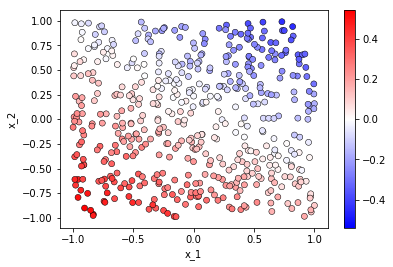

(<matplotlib.figure.Figure at 0x18da90f2320>,
 <matplotlib.axes._subplots.AxesSubplot at 0x18da9128dd8>)

In [4]:
X2, Y2 = generate_dataset2()
plot_dataset(X2, Y2)

### SGD from a single point

First, let's visualize SGD from a single starting point:

In [11]:
# Parameters to feed the SGD.
# <FR> changes the animation speed.
params = ({'w_start': [0.01, 0.01], 'eta': 0.00001},)
N_epochs = 1000
FR = 20

# Let's animate it!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR)
HTML(anim.to_html5_video())

Performing SGD with parameters {'w_start': [0.01, 0.01], 'eta': 1e-05} ...

Animating...


Let's view how the weights change as the algorithm converges:

In [12]:
# Parameters to feed the SGD.
params = ({'w_start': [0.01, 0.01], 'eta': 0.00001},)
N_epochs = 1000
FR = 20

# Let's do it!
W, _ = SGD(X1, Y1, params[0]['w_start'], params[0]['eta'], N_epochs)
anim = animate_convergence(X1, Y1, W, FR)
HTML(anim.to_html5_video())


Animating...


### SGD from multiple points

Now, let's visualize SGD from multiple arbitrary starting points:

In [13]:
# Parameters to feed the SGD.
# Here, we specify each different set of initializations as a dictionary.
params = (
    {'w_start': [-0.8, -0.3], 'eta': 0.00001},
    {'w_start': [-0.9, 0.4], 'eta': 0.00001},
    {'w_start': [-0.4, 0.9], 'eta': 0.00001},
    {'w_start': [0.8, 0.8], 'eta': 0.00001},
)
N_epochs = 1000
FR = 20

# Let's go!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR)
HTML(anim.to_html5_video())

Performing SGD with parameters {'w_start': [-0.8, -0.3], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.9, 0.4], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.4, 0.9], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [0.8, 0.8], 'eta': 1e-05} ...

Animating...


Let's do the same thing but with a different dataset:

In [14]:
# Parameters to feed the SGD.
params = (
    {'w_start': [-0.8, -0.3], 'eta': 0.00001},
    {'w_start': [-0.9, 0.4], 'eta': 0.00001},
    {'w_start': [-0.4, 0.9], 'eta': 0.00001},
    {'w_start': [0.8, 0.8], 'eta': 0.00001},
)
N_epochs = 1000
FR = 20

# Animate!
anim = animate_sgd_suite(SGD, loss, X2, Y2, params, N_epochs, FR)
HTML(anim.to_html5_video())

Performing SGD with parameters {'w_start': [-0.8, -0.3], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.9, 0.4], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.4, 0.9], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [0.8, 0.8], 'eta': 1e-05} ...

Animating...


## Problem 4E: SGD with different step sizes

Now, let's visualize SGD with different step sizes (eta):

(For ease of visualization: the trajectories are ordered from left to right by increasing eta value. Also, note that we use smaller values of N_epochs and FR here for easier visualization.)

In [15]:
# Parameters to feed the SGD.
params = (
    {'w_start': [0.7, 0.8], 'eta': 0.00001},
    { 'w_start': [0.2, 0.8], 'eta': 0.00005},
    {'w_start': [-0.2, 0.7], 'eta': 0.0001},
    {'w_start': [-0.6, 0.6], 'eta': 0.0002},
)
N_epochs = 100
FR = 2

# Go!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR, ms=2)
HTML(anim.to_html5_video())

Performing SGD with parameters {'w_start': [0.7, 0.8], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [0.2, 0.8], 'eta': 5e-05} ...
Performing SGD with parameters {'w_start': [-0.2, 0.7], 'eta': 0.0001} ...
Performing SGD with parameters {'w_start': [-0.6, 0.6], 'eta': 0.0002} ...

Animating...


### Plotting SGD Convergence

Let's visualize the difference in convergence rates a different way. Plot the loss with respect to epoch (iteration) number for each value of eta on the same graph.

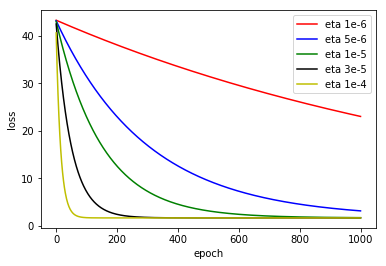

In [25]:
'''Plotting SGD convergence'''

#==============================================
# TODO: For the given learning rates, plot the 
# loss for each epoch.
#==============================================

eta_vals = [1e-6, 5e-6, 1e-5, 3e-5, 1e-4]
w_start = [0.01, 0.01]
N_epochs = 1000

dummy, losses1 = SGD(X1, Y1, w_start, eta_vals[0], N_epochs)
dummy, losses2 = SGD(X1, Y1, w_start, eta_vals[1], N_epochs)
dummy, losses3 = SGD(X1, Y1, w_start, eta_vals[2], N_epochs)
dummy, losses4 = SGD(X1, Y1, w_start, eta_vals[3], N_epochs)
dummy, losses5 = SGD(X1, Y1, w_start, eta_vals[4], N_epochs)
xs = range(N_epochs)
plt.figure()
plt.plot(xs, losses1, 'r', label='eta 1e-6')
plt.plot(xs, losses2, 'b', label='eta 5e-6')
plt.plot(xs, losses3, 'g', label='eta 1e-5')
plt.plot(xs, losses4, 'k', label='eta 3e-5')
plt.plot(xs, losses5, 'y', label='eta 1e-4')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
    
    

Clearly, a big step size results in fast convergence! Why don't we just set eta to a really big value, then? Say, eta=1?

(Again, note that the FR is lower for this animation.)

Performing SGD with parameters {'w_start': [0.01, 0.01], 'eta': 1} ...

Animating...


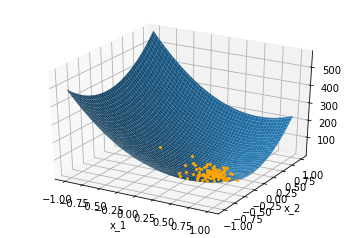

In [26]:
# Parameters to feed the SGD.
params = ({'w_start': [0.01, 0.01], 'eta': 1},)
N_epochs = 100
FR = 2

# Voila!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR, ms=2)
HTML(anim.to_html5_video())

Just for fun, let's try eta=10 as well. What happens? (Hint: look at W)

In [27]:
# Parameters to feed the SGD.
w_start = [0.01, 0.01]
eta = 10
N_epochs = 100

# Presto!
W, losses = SGD(X1, Y1, w_start, eta, N_epochs)

C:\Users\tyll1\Anaconda3\lib\site-packages\ipykernel\__main__.py:56: RuntimeWarning: overflow encountered in multiply


## Extra Visualization (not part of the homework problem)

One final visualization! What happens if the loss function has multiple optima?

In [28]:
# Import different SGD & loss functions.
# In particular, the loss function has multiple optima.
from sgd_multiopt_helper import SGD, loss

# Parameters to feed the SGD.
params = (
    {'w_start': [0.9, 0.9], 'eta': 0.01},
    { 'w_start': [0.0, 0.0], 'eta': 0.01},
    {'w_start': [-0.8, 0.6], 'eta': 0.01},
    {'w_start': [-0.8, -0.6], 'eta': 0.01},
    {'w_start': [-0.4, -0.3], 'eta': 0.01},
)
N_epochs = 100
FR = 2

# One more time!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR, ms=2)
HTML(anim.to_html5_video())

ModuleNotFoundError: No module named 'sgd_multiopt_helper'